In [42]:
import numpy as np
# the log of posterior is -sum_i(sum_j(log g'(w_j^T x^i)+log norm(W)))
# w_j is the row vector of W
# i=1,2...m is the data number
# j=1,2...n is the dimension of the data
# g(s)=1/(1+e^-s) sigmoid function
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

dim=4
k=0.01
ite=200
N=20
W=np.random.rand(dim,dim)

# sigmoid function
def g(s):
    return 1/(1+np.exp(-s))
def dg(s):
    return g(s)*(1-g(s))

In [43]:
# loss function
def loglikeihood(W,X):
    loglike=0
    for x in X:
        temp=0
        for i in range(len(W)):
            wx=np.dot(W[i],x)
            temp=temp+np.log(dg(wx))
        temp=temp+np.log(np.absolute(np.linalg.det(W)))
        loglike=loglike+temp
    return loglike

In [44]:
# update function for SGLD method
def update(W,x,step):
    x1=np.array([x])
    temp=[]
    for i in range(len(W)):
        temp1=[]
        wx=np.dot(W[i],x)
        temp1.append(1-2*g(wx))
        temp.append(temp1)
    temp=np.array(temp)
    gradient=np.dot(temp,x1)+np.linalg.inv(np.transpose(W))
    noise=np.zeros([dim,dim])
    for t in range(dim):
        for k in range(dim): 
            noise[t][k]=np.random.normal(0,0.01)/dim
    W=W+step*gradient+noise
    return W

# update function for NSGLD method
def update2(W,x,step,I,J):
    x1=np.array([x])
    temp=[]
    for i in range(len(W)):
        temp1=[]
        wx=np.dot(W[i],x)
        temp1.append(1-2*g(wx))
        temp.append(temp1)
    temp=np.array(temp)
    gradient=np.dot(temp,x1)+np.linalg.inv(np.transpose(W))
    noise=np.zeros([dim,dim])
    for t in range(dim):
        for k in range(dim):
            noise[t][k]=np.random.normal(0,0.01)/dim
    W=W+step*np.dot(I+J,gradient)+noise
    return W

In [45]:
# SGLD method
Y=X
history=[]
for i in range(N):
    np.random.seed(0)
    W=np.random.rand(dim,dim)
    temp=[]
    np.random.seed(i)
    for t in range(ite):
        step=k/(1+0.1*t)
        idx = np.random.randint(len(X), size=100)
        X1=X[idx,:]
        for x in X:
            W=update(W,x,step)
        temp.append(loglikeihood(W,Y)/150)
    history.append(temp)
history=np.transpose(history)
m=[]
for i in history:
    m.append(np.mean(i))

In [53]:
# NSGLD with tau=1
Y=X
history2=[]
# np.random.seed(0)
for i in range(N):
    np.random.seed(0)
    W2=np.random.rand(dim,dim)
    oneit=[]
    I=np.eye(dim)
    J=np.zeros([dim,dim])
    for temp in range(dim):
        for temp1 in range(dim-temp-1):
            t=np.random.normal(0,1)*1
            J[temp][temp1+temp+1]=t/dim
            J[temp1+temp+1][temp]=-t/dim
    np.random.seed(i)
    for t in range(ite):
        step=k/(1+0.1*t)
        idx = np.random.randint(len(X), size=100)
        X1=X[idx,:]
        for x in X1:
            W2=update2(W2,x,step,I,J)
        oneit.append(loglikeihood(W2,Y)/150)
    history2.append(oneit)
history2=np.transpose(history2)
m1=[]
for i in history2:
    m1.append(np.mean(i))

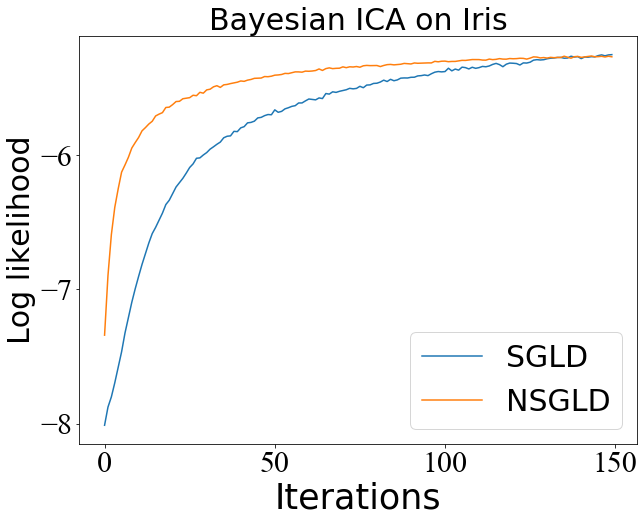

In [58]:
# figure of iris data set in figure 2
import matplotlib.pyplot as plt
figsize = 10,7.5
figure, ax = plt.subplots(figsize=figsize)
plt.plot(m[0:150])
plt.plot(m1[0:150])
plt.title('Bayesian ICA on Iris',fontsize=30)
plt.ylabel('Log likelihood',fontsize=30)
plt.xlabel('Iterations',fontsize=35)
plt.legend(['SGLD','NSGLD'], loc='lower right',fontsize=30)
plt.tick_params(labelsize=30)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.show()